#### Seminal quality prediction using logistic regression

In [231]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import plt
from sklearn import metrics

In [232]:
col_names = np.array(['season','age','child_diseases','accident',
                      'surgical_intervention','high_fevers', 
                      'alcohol', 'smoking','hrs_sitting','diagnosis'])

data = pd.read_csv("data/fertility_Diagnosis.csv", header=None, names=col_names)
data.dropna(inplace = True)

print("Data dimensionality", data.shape)
data.head()

Data dimensionality (100, 10)


,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting,diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [233]:
# Encode the diagnosis to binary form
# Diagnosis: normal (N), altered (O)	
diagnosis = data.iloc[:,-1]

label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(diagnosis)

# Review the encoded lables
encoded_compr = pd.DataFrame({'diagnosis': diagnosis, 'encoded_label': encoded_label})
encoded_compr.head()

,diagnosis,encoded_label
0,N,0
1,O,1
2,N,0
3,N,0
4,O,1


<Axes: title={'center': 'Distrbution of diagnosis results'}, xlabel='Diagnosis', ylabel='Frequency'>

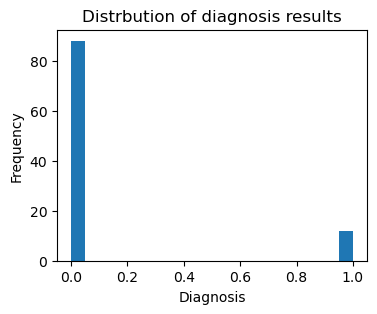

In [234]:
# Distribution of target
distr = pd.DataFrame(encoded_label)
distr.plot.hist(bins=20, 
                figsize=(4,3), 
                xlabel='Diagnosis', 
                legend=False, 
                title='Distrbution of diagnosis results')

Logistic Model

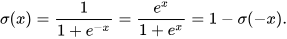

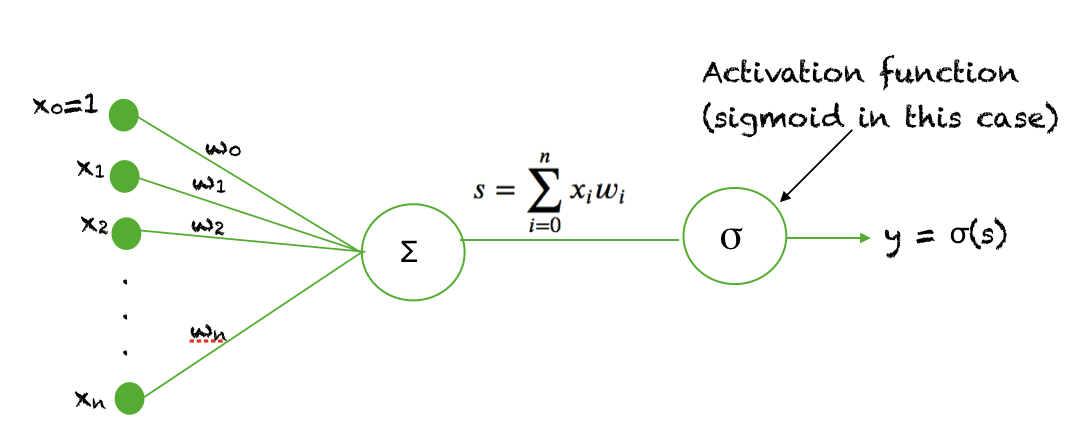

# Why The Sigmoid Function Is Important In Neural Networks?

If we use a linear activation function in a neural network, then this model can only learn linearly separable problems. However, with the addition of just one hidden layer and a sigmoid activation function in the hidden layer, the neural network can easily learn a non-linearly separable problem. Using a non-linear function produces non-linear boundaries and hence, the sigmoid function can be used in neural networks for learning complex decision functions.

The only non-linear function that can be used as an activation function in a neural network is one which is monotonically increasing. So for example, sin(x) or cos(x) cannot be used as activation functions. Also, the activation function should be defined everywhere and should be continuous everywhere in the space of real numbers. The function is also required to be differentiable over the entire space of real numbers.

Typically a back propagation algorithm uses gradient descent to learn the weights of a neural network. To derive this algorithm, the derivative of the activation function is required.

The fact that the sigmoid function is monotonic, continuous and differentiable everywhere, coupled with the property that its derivative can be expressed in terms of itself, makes it easy to derive the update equations for learning the weights in a neural network when using back propagation algorithm.

In [235]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [236]:
def hx(w, X):
    bias = w[0]
    weights = w[1:]
    
    wX = np.array(X.dot(weights))
    z = bias + wX

    return sigmoid(z)

Cost Function - Binary Cross Entropy

In [237]:
def cost(w, X, Y):
    y_pred = hx(w,X)
    return -1 * np.sum(Y*np.log(y_pred) + (1-Y)*np.log(1-y_pred))

Gradient Descent

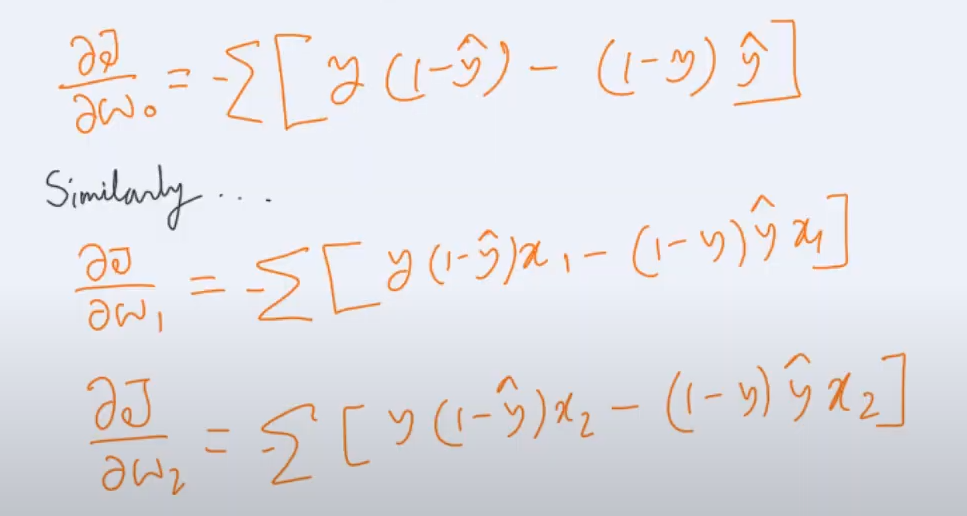

In [238]:
def grad(w, X, Y):
    y_pred = hx(w,X)
    g = np.array([])

    dww = -1 * np.sum(Y*(1-y_pred) - (1-Y)*y_pred)
    g = np.append(g, dww)

    for i in range(1, len(w)):
        dw = -1 * np.sum(Y*(1-y_pred)*X[:,i-1] - (1-Y)*y_pred*X[:,i-1])
        g = np.append(g, dw)
    
    return g

In [239]:
# Update weights 
def descent(X, Y, w_new, w_prev, lr, iters):
    print('w: ', w_prev)
    print('cost: ', cost(w_prev, X, Y))

    for iter in range(iters):
        w_prev = w_new
        w_new = np.array([])
        for i in range(len(w_prev)):
            wi = w_prev[i] - lr*grad(w_prev, X, Y)[i]
            w_new = np.append(w_new, wi)
        
        # print('new_w: ', w_prev)
        # print('cost: ', cost(w_prev, X, Y))
        # print('iter: ', iter)

        # ??? powr
        if np.sum((w_new - w_prev)**2) < pow(10,-6):
            return w_new

    return w_new

Initializing Parameters

In [240]:
X = data.iloc[:,:-1]
Y = encoded_label

X_train, X_test, y_train, y_test= train_test_split(X.to_numpy(), Y, test_size=0.25, random_state=42)

In [241]:
# Initialize weights to 1s, including bias
w = np.ones(X.shape[1]+1)

Training the Model

In [242]:
w = descent(X_train, y_train, w,w,.0099, 100)

print('\nfinal weights: ', w)

w:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
cost:  288.3454993770029

final weights:  [-1.17879962  0.84674769  0.02486797 -0.21053562 -1.18110566  1.08475318
 -0.23010329 -0.89894567  0.72390179 -0.13923315]


Lets visualize the Results

In [261]:
def predict(w, X):
    y_pred = hx(w, X)
    class_pred = [0 if y<0.15 else 1 for y in y_pred]
    return class_pred

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0]


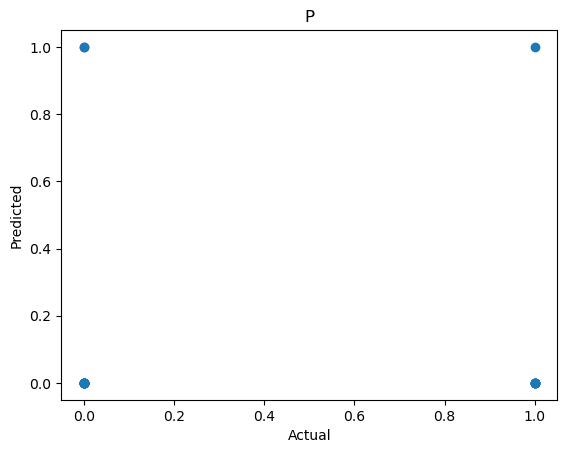

In [264]:
# Use the new weights to fit new data
y_pred = predict(w, X_test)

print(y_pred)

plt.scatter(y_pred, y_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('P')
plt.show()

In [271]:
# accuracy = metrics.accuracy_score(y_test, y_pred)
y_pred = predict(w, X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[16,  6],
       [ 2,  1]])

In [245]:
# def graph(formula, x_range):
#     x = np.array(x_range)
#     y = formula(x)
#     plt.plot(x, y)

# def my_formula(x):
#     return (-w[0]-w[1]*x)/w[2]

# from matplotlib import pyplot as plt
# from pandas import DataFrame
# df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
# colors = {0:'green', 1:'red'}
# fig, ax = plt.subplots()
# grouped = df.groupby('label')
# for key, group in grouped:
#     group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
# graph(my_formula, range(-20,15))
# plt.xlabel('Green')
# plt.ylabel('Red')
# plt.show()

Check the papaper on metrics

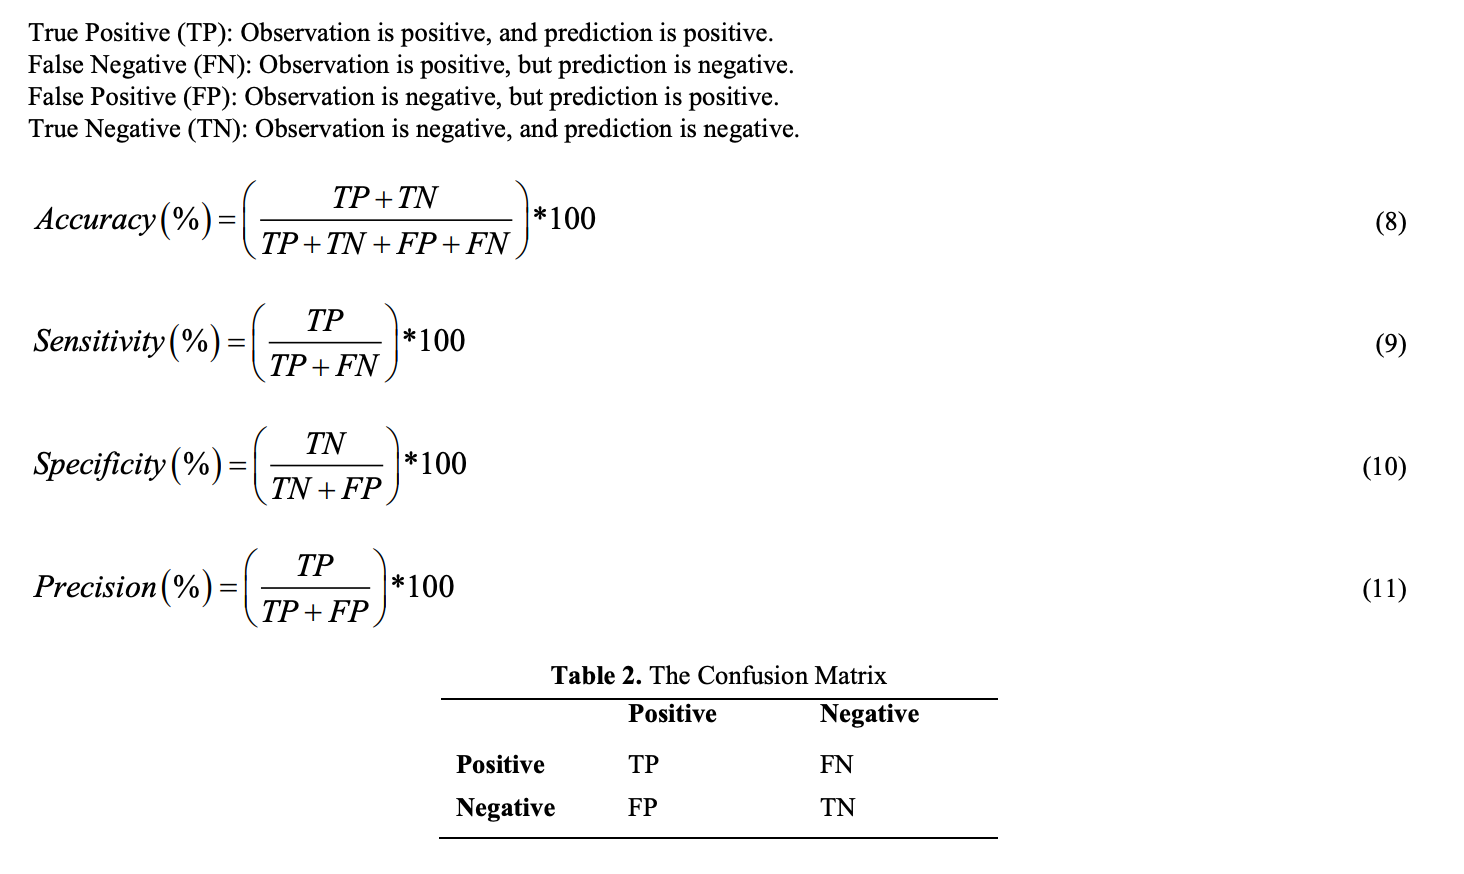